In [5]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Crear un dataset ficticio
from sklearn.dummy import DummyClassifier


np.random.seed(123)
n_samples = 1500
X = np.random.rand(n_samples, 3)  # Dos características: frecuencia de palabras y longitud
y = (X[:, 0] * 2 + X[:, 1] * 3 - X[:, 2] > 1.5).astype(int)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Usar un clasificador aleatorio (modelo con mal desempeño)
Dummy = DummyClassifier(strategy="uniform")  # Predice aleatoriamente
Dummy.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = Dummy.predict(X_test)
y_pred_proba = Dummy.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC


# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Mostrar métricas
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

Exactitud (Accuracy): 0.49
Precisión (Precision): 0.65
Sensibilidad (Recall): 0.48
F1-Score: 0.55
AUC: 0.50


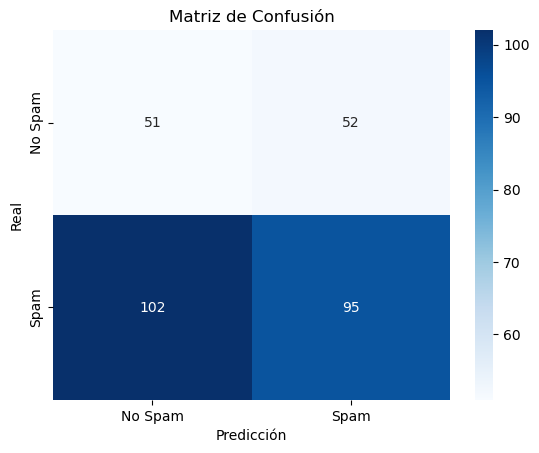

In [17]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Spam', 'Spam'],
            yticklabels=['No Spam', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()